Question = 1

In [1]:
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep='|')

In [3]:
users = pd.read_csv(url, sep='|')

In [4]:
users.groupby('occupation')['age'].mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [5]:
def count_males(series):
    return (series == 'M').sum()

# Apply the function to the 'gender' column grouped by 'occupation'
males_by_occupation = users.groupby('occupation')['gender'].apply(count_males)

# Define a function to calculate the total number of people by occupation
def total_people_by_occupation(series):
    return series.count()

# Apply the function to the 'gender' column grouped by 'occupation'
total_people_by_occupation = users.groupby('occupation')['gender'].apply(total_people_by_occupation)

# Calculate the male ratio per occupation
male_ratio_by_occupation = males_by_occupation / total_people_by_occupation

# Sort the male ratio from the most to the least
male_ratio_by_occupation.sort_values(ascending=False)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64

In [6]:
users.groupby('occupation')['age'].agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
def count_females(series):
    return (series == 'F').sum()

# Apply the function to the 'gender' column grouped by 'occupation'
females_by_occupation = users.groupby('occupation')['gender'].apply(count_females)

# Calculate the total number of people by occupation
total_people_by_occupation = users.groupby('occupation')['gender'].count()

# Calculate the percentage of females and males by occupation
percentage_female_by_occupation = females_by_occupation / total_people_by_occupation * 100
percentage_male_by_occupation = 100 - percentage_female_by_occupation

# Create a new DataFrame to store the results
gender_by_occupation = pd.DataFrame({'Percentage Female': percentage_female_by_occupation,
                                     'Percentage Male': percentage_male_by_occupation})

# Sort the DataFrame by the percentage of male
gender_by_occupation.sort_values('Percentage Male', ascending=False)

,Percentage Female,Percentage Male
occupation,,
doctor,0.000000,100.000000
engineer,2.985075,97.014925
technician,3.703704,96.296296
retired,7.142857,92.857143
programmer,9.090909,90.909091
executive,9.375000,90.625000
scientist,9.677419,90.322581
entertainment,11.111111,88.888889
lawyer,16.666667,83.333333


Question = 2

In [8]:
import pandas as pd

In [9]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

In [10]:
euro12 = pd.read_csv(url)

In [11]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [12]:
euro12['Team'].count()

16

In [13]:
euro12.shape[1]

35

In [14]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

In [15]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [16]:
euro12['Yellow Cards'].mean()

7.4375

In [17]:
euro12[euro12['Goals'] > 6]['Team']

5     Germany
13      Spain
Name: Team, dtype: object

In [18]:
euro12[euro12['Team'].str.startswith('G')]['Team']

5    Germany
6     Greece
Name: Team, dtype: object

In [19]:
euro12.iloc[:, :7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [20]:
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [21]:
euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question = 3

In [22]:
import pandas as pd
import numpy as np

In [23]:
s1 = pd.Series(np.random.randint(1, 5, size=100))
s2 = pd.Series(np.random.randint(1, 4, size=100))
s3 = pd.Series(np.random.randint(10000, 30001, size=100))

In [24]:
df = pd.concat([s1, s2, s3], axis=1)

In [25]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [26]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()

In [27]:
print(len(bigcolumn)) # Output: 300
print(bigcolumn.index.max()) # Output: 299

300
99


In [28]:
bigcolumn = bigcolumn.reset_index(drop=True)

Question = 4

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_table('wind.txt', sep='\s+', na_values='NaN')

In [ ]:
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']], format='%Y %m %d')
data = data.set_index('date')
data = data.drop(columns=['Yr', 'Mo', 'Dy'])

In [ ]:
def fix_year(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return pd.to_datetime(year * 10000 + x.month * 100 + x.day, format='%Y%m%d')

data.index = data.index.map(fix_year)

In [ ]:
missing = data.isna().sum()

In [ ]:
nobs = data.notna().sum().sum()

In [ ]:
mean_windspeed = data.mean().mean()

In [ ]:
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

In [ ]:
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

In [ ]:
january_data = data[data.index.month == 1]
january_stats = january_data.mean()

In [ ]:
yearly_data = data.resample('Y').mean()

In [ ]:
monthly_data = data.resample('M').mean()

In [ ]:
weekly_data = data.resample('W').mean()

In [ ]:
weekly_data

Question = 5

In [29]:
import pandas as pd
import numpy as np

In [30]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [31]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [32]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [33]:
chipo.shape[0]  # 4622

4622

In [34]:
chipo.shape[1]  # 5

5

In [35]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [36]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [37]:
item_count = chipo.groupby('item_name').sum()
item_count = item_count.sort_values(['quantity'], ascending=False)
item_count.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [38]:
item_count = chipo.groupby('item_name').sum()
item_count = item_count.sort_values(['quantity'], ascending=False)
item_count.head(1)['quantity']

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

In [39]:
choice_count = chipo.groupby('choice_description').sum()
choice_count = choice_count.sort_values(['quantity'], ascending=False)
choice_count.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [40]:
total_items_orders = chipo['quantity'].sum()
total_items_orders

4972

In [41]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:-1]))
chipo.item_price.dtype

dtype('float64')

In [42]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
round(revenue, 2)

39237.02

In [43]:
total_orders = chipo.order_id.nunique()
total_orders

1834

In [44]:
average_revenue = revenue/total_orders
round(average_revenue, 2)

21.39

In [45]:
chipo.item_name.nunique()

50

Question = 6

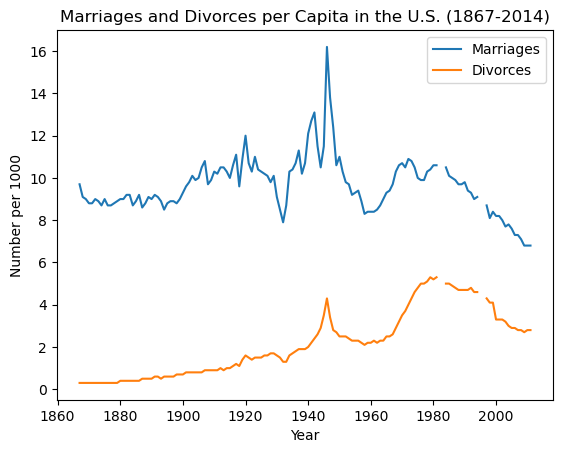

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the file
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Extract the years, marriages per capita, and divorces per capita from the data
years = df['Year']
marriages_per_capita = df['Marriages_per_1000']
divorces_per_capita = df['Divorces_per_1000']

# Create a line plot
plt.plot(years, marriages_per_capita, label='Marriages')
plt.plot(years, divorces_per_capita, label='Divorces')

# Add axis labels and a legend
plt.xlabel('Year')
plt.ylabel('Number per 1000')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Display the plot
plt.show()


Question = 7

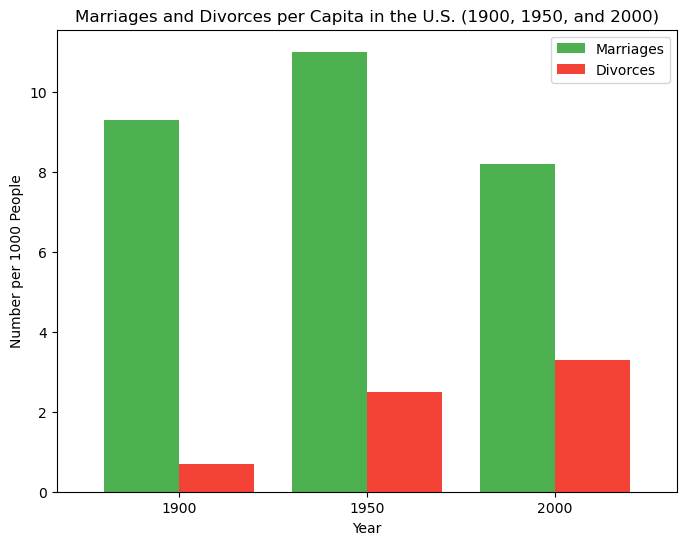

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from file
df = pd.read_csv("us-marriages-divorces-1867-2014.csv")

# Filter data for years 1900, 1950, and 2000
df_yearly = df[df['Year'].isin([1900, 1950, 2000])]

# Set 'Year' column as index
df_yearly = df_yearly.set_index('Year')

# Select relevant columns for plotting
df_yearly = df_yearly[['Marriages_per_1000', 'Divorces_per_1000']]

# Plot data as vertical bar chart
ax = df_yearly.plot(kind='bar', figsize=(8,6), width=0.8, color=['#4CAF50', '#F44336'])

# Set labels for title and axes
ax.set_title("Marriages and Divorces per Capita in the U.S. (1900, 1950, and 2000)")
ax.set_xlabel("Year")
ax.set_ylabel("Number per 1000 People")

ax.set_xticklabels(df_yearly.index, rotation=0)
ax.legend(["Marriages", "Divorces"])
plt.show()

Question = 8

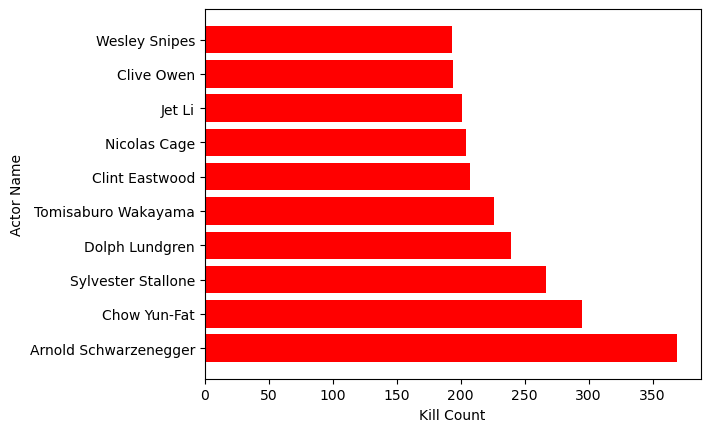

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

#1: Read the data from a CSV file into a pandas dataframe
df = pd.read_csv("actor_kill_counts.csv")

#2: Sort the dataframe by the 'Count' column in descending order
df = df.sort_values(by='Count', ascending=False)

#3: Create a horizontal bar chart using matplotlib
plt.barh(df['Actor'], df['Count'], color='red')

#4: Label the x and y axis
plt.xlabel('Kill Count')
plt.ylabel('Actor Name')

#5: Show the plot
plt.show()


Question = 9

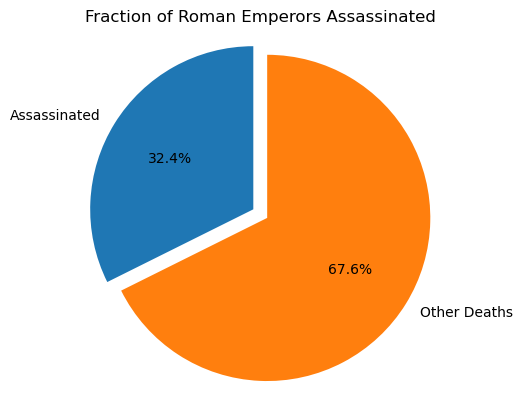

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

#1: Load the data from the CSV file
data = pd.read_csv("roman-emperor-reigns.csv")

#2: Count the number of emperors who were assassinated
assassinated = data[data["Cause_of_Death"] == "Assassinated"]
num_assassinated = len(assassinated)

#3: Count the number of emperors who died from other causes
other_deaths = data[data["Cause_of_Death"] != "Assassinated"]
num_other_deaths = len(other_deaths)

#4: Create a pie chart with the results
labels = ["Assassinated", "Other Deaths"]
sizes = [num_assassinated, num_other_deaths]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

#5: Add title and show the plot
plt.title("Fraction of Roman Emperors Assassinated")
plt.show()


Question = 10

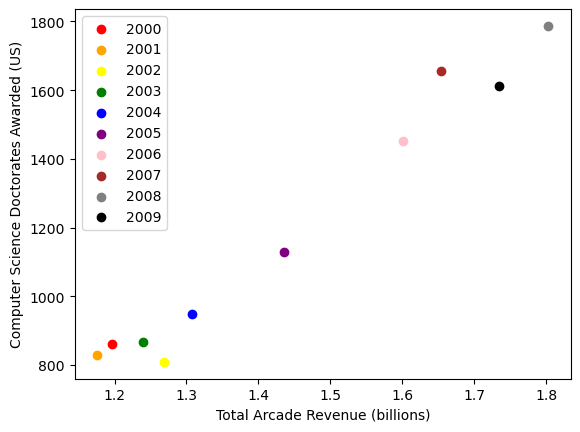

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from file
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Extract the data for each year
year2000 = data[data['Year'] == 2000]
year2001 = data[data['Year'] == 2001]
year2002 = data[data['Year'] == 2002]
year2003 = data[data['Year'] == 2003]
year2004 = data[data['Year'] == 2004]
year2005 = data[data['Year'] == 2005]
year2006 = data[data['Year'] == 2006]
year2007 = data[data['Year'] == 2007]
year2008 = data[data['Year'] == 2008]
year2009 = data[data['Year'] == 2009]

# Create the scatter plot
plt.scatter(year2000['Total Arcade Revenue (billions)'], year2000['Computer Science Doctorates Awarded (US)'], color='red', label='2000')
plt.scatter(year2001['Total Arcade Revenue (billions)'], year2001['Computer Science Doctorates Awarded (US)'], color='orange', label='2001')
plt.scatter(year2002['Total Arcade Revenue (billions)'], year2002['Computer Science Doctorates Awarded (US)'], color='yellow', label='2002')
plt.scatter(year2003['Total Arcade Revenue (billions)'], year2003['Computer Science Doctorates Awarded (US)'], color='green', label='2003')
plt.scatter(year2004['Total Arcade Revenue (billions)'], year2004['Computer Science Doctorates Awarded (US)'], color='blue', label='2004')
plt.scatter(year2005['Total Arcade Revenue (billions)'], year2005['Computer Science Doctorates Awarded (US)'], color='purple', label='2005')
plt.scatter(year2006['Total Arcade Revenue (billions)'], year2006['Computer Science Doctorates Awarded (US)'], color='pink', label='2006')
plt.scatter(year2007['Total Arcade Revenue (billions)'], year2007['Computer Science Doctorates Awarded (US)'], color='brown', label='2007')
plt.scatter(year2008['Total Arcade Revenue (billions)'], year2008['Computer Science Doctorates Awarded (US)'], color='gray', label='2008')
plt.scatter(year2009['Total Arcade Revenue (billions)'], year2009['Computer Science Doctorates Awarded (US)'], color='black', label='2009')

# Set the axis labels
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')

# Add a legend
plt.legend()

# Show the plot
plt.show()
